# Junior Data Scientist – Trader Behavior Insights

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns' ,30)

## 2. Loading the Dataset

In [2]:
df1=pd.read_csv("fear_greed_index.csv")
df2=pd.read_csv("historical_data.csv")

## 3. Understanding the structure 
### (i) Dataset 1

In [3]:
df1.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [5]:
df1.isna().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

#### Distribution of market emotion  

In [6]:
val=df1["classification"].value_counts().values
index=df1["classification"].value_counts().index
df1["classification"].value_counts()

classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64

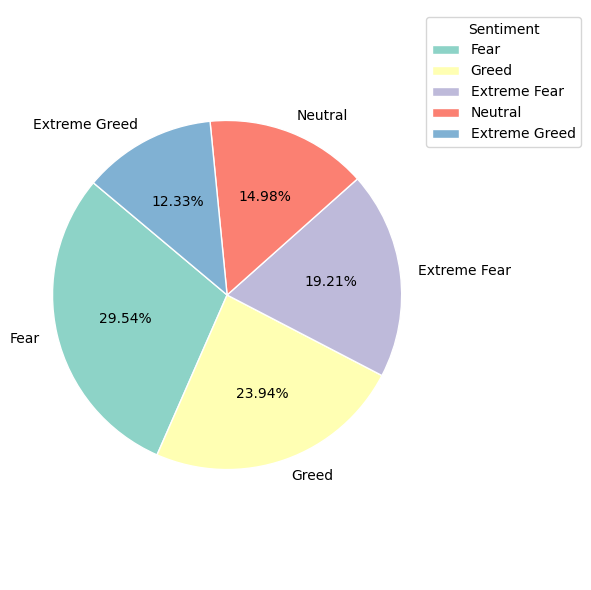

In [7]:
colors = plt.get_cmap('Set3').colors

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    val,
    labels=index,
    autopct="%1.2f%%",
    startangle=140,
    colors=colors,
    textprops={'fontsize': 10, 'color': 'black'},
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
plt.legend(wedges, index, title="Sentiment", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')
plt.tight_layout()
plt.show()

distribution of greed and fear emotion is pretty even

In [8]:
df1.groupby("classification")["value"].mean().reset_index().sort_values(by="value").rename(columns={"value":"mean_value"})

,classification,mean_value
0,Extreme Fear,18.273622
2,Fear,34.184379
4,Neutral,49.964646
3,Greed,65.846761
1,Extreme Greed,82.116564


In [9]:
Max_thresh=df1.groupby("classification")["value"].max().reset_index().sort_values(by="value").rename(columns={"value":"Max_Threshold"})
Max_thresh

,classification,Max_Threshold
0,Extreme Fear,24
2,Fear,44
4,Neutral,54
3,Greed,74
1,Extreme Greed,95


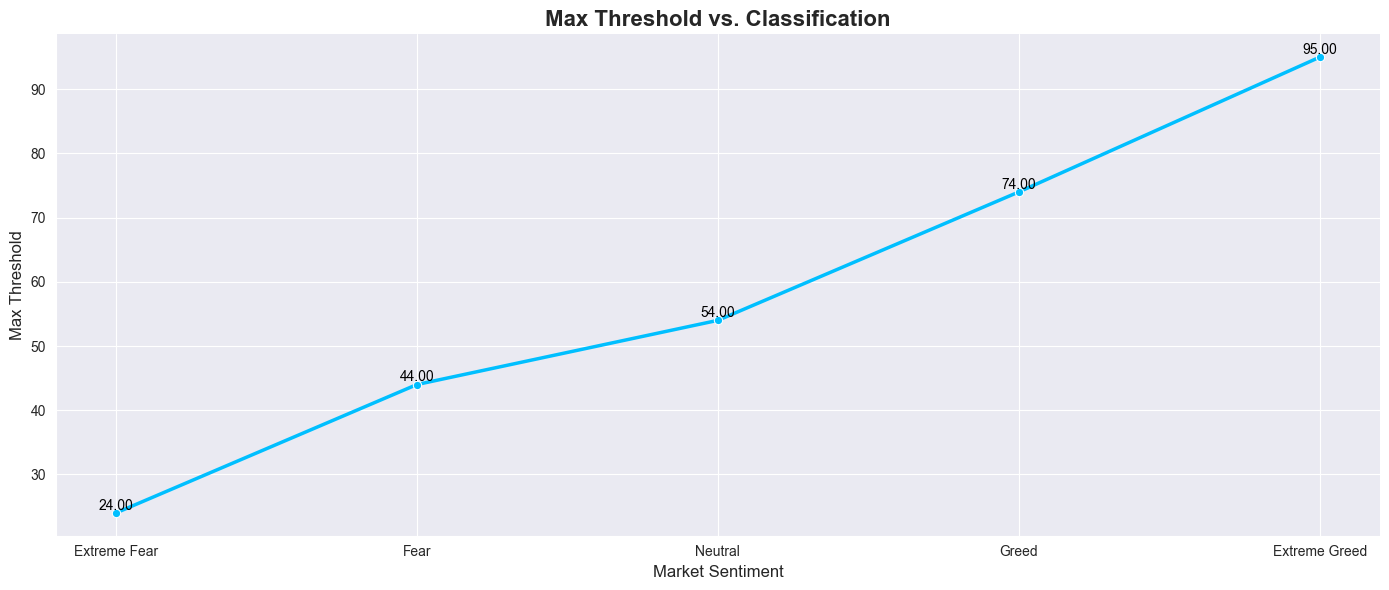

In [10]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 6))

sns.lineplot(
    data=Max_thresh,
    x="classification",
    y="Max_Threshold",
    marker='o',
    linewidth=2.5,
    color='deepskyblue'
)
for i, row in Max_thresh.iterrows():
    plt.text(
        row["classification"],
        row["Max_Threshold"] + 0.5, 
        f'{row["Max_Threshold"]:.2f}',
        ha='center',
        fontsize=10,
        color='Black'
    )
plt.title("Max Threshold vs. Classification", fontsize=16, fontweight='bold')
plt.xlabel("Market Sentiment", fontsize=12)
plt.ylabel("Max Threshold", fontsize=12)
sns.despine()

plt.tight_layout()
plt.show()

Linear Increment is seen

In [11]:
Min_thresh=df1.groupby("classification")["value"].min().reset_index().sort_values(by="value").rename(columns={"value":"Min_Threshold"})
Min_thresh

,classification,Min_Threshold
0,Extreme Fear,5
2,Fear,25
4,Neutral,45
3,Greed,55
1,Extreme Greed,75


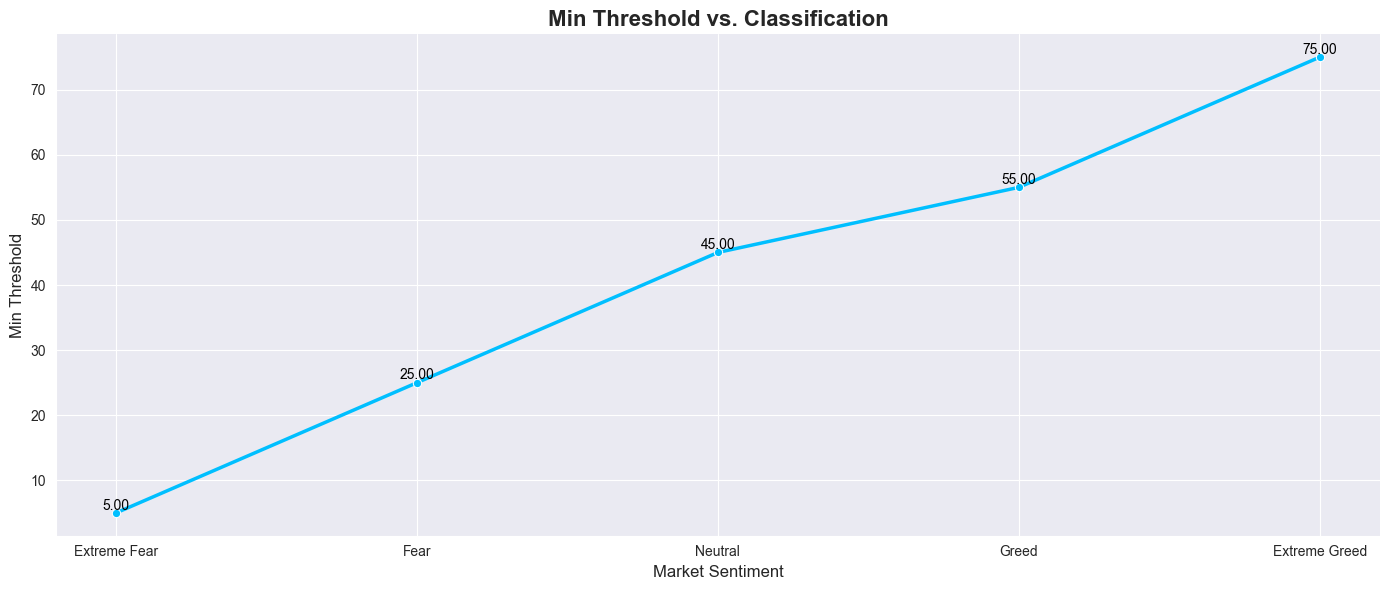

In [12]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 6))

sns.lineplot(
    data=Min_thresh,
    x="classification",
    y="Min_Threshold",
    marker='o',
    linewidth=2.5,
    color='deepskyblue'
)
for i, row in Min_thresh.iterrows():
    plt.text(
        row["classification"],
        row["Min_Threshold"] + 0.5, 
        f'{row["Min_Threshold"]:.2f}',
        ha='center',
        fontsize=10,
        color='Black'
    )
plt.title("Min Threshold vs. Classification", fontsize=16, fontweight='bold')
plt.xlabel("Market Sentiment", fontsize=12)
plt.ylabel("Min Threshold", fontsize=12)
sns.despine()

plt.tight_layout()
plt.show()

Again Linear Increment is seen as expected plus got to know that the values are not colliding

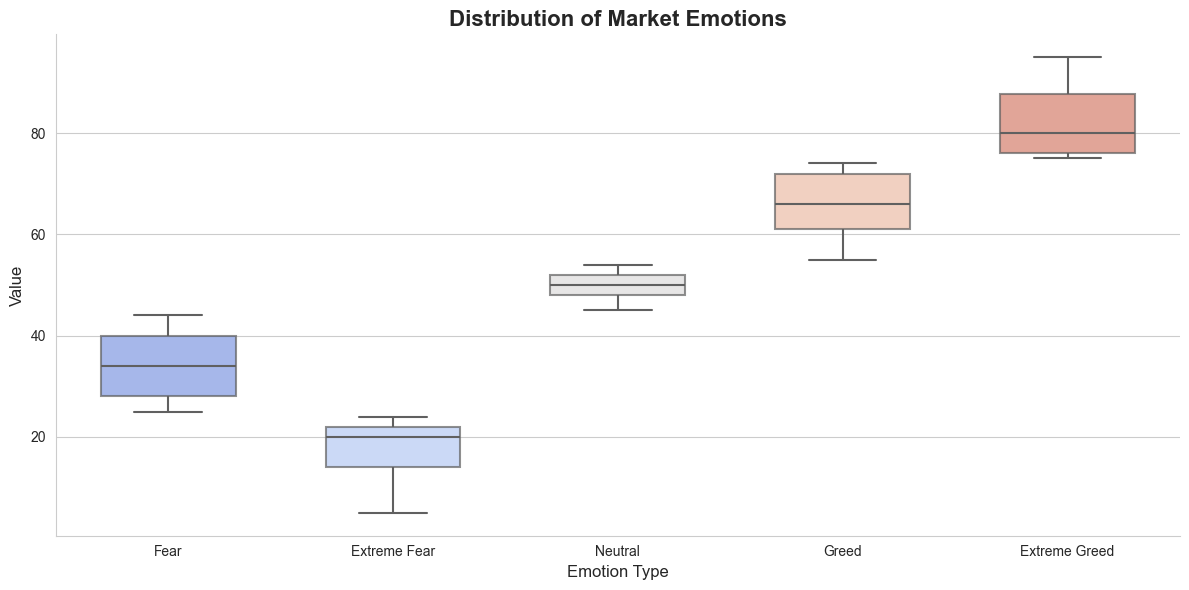

In [13]:
plt.figure(figsize=(12, 6)) 
sns.set_style("whitegrid")  
sns.boxplot(
    data=df1,
    x="classification",
    y="value",
    palette="coolwarm",
    width=0.6,
    linewidth=1.5,
    fliersize=3,       
    boxprops=dict(alpha=0.7) 
)
plt.title("Distribution of Market Emotions", fontsize=16, fontweight='bold')
plt.xlabel("Emotion Type", fontsize=12)
plt.ylabel("Value", fontsize=12)
sns.despine()

plt.tight_layout()
plt.show()

#### Extreme Fear:
>Lowest median value (~20)
>High variability with minimum values going below 10.

#### Fear:

>Median is slightly above 30.
Less volatile than Extreme Fear but still shows moderate uncertainty.

#### Neutral:
>Median around 50.
Least variability among all emotions.

#### Greed:
>Median is around 65–70.
Moderate variability, suggesting consistent bullish sentiment.

#### Extreme Greed:
>Highest median (~80).
Wider spread, with values extending above 90.

#### Distribution of market emotion according to time

In [14]:
df1.dtypes["date"]

dtype('O')

In [15]:
df1["date"] = pd.to_datetime(df1["date"])

In [16]:
df1.dtypes["date"]

dtype('<M8[ns]')

In [17]:
df1["date"].dt.year.min(), df1["date"].dt.year.max()

(2018, 2025)

In [18]:
df1["date"].dt.year.unique()

array([2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025], dtype=int32)

In [19]:
df1["year"] = df1["date"].dt.year

In [20]:
grouped_df=df1.groupby(["year","classification"]).size().reset_index().rename(columns={0:"Count"})
grouped_df

,year,classification,Count
0,2018,Extreme Fear,130
1,2018,Fear,154
2,2018,Greed,23
3,2018,Neutral,24
4,2019,Extreme Fear,57
5,2019,Extreme Greed,24
6,2019,Fear,153
7,2019,Greed,97
8,2019,Neutral,34
9,2020,Extreme Fear,49


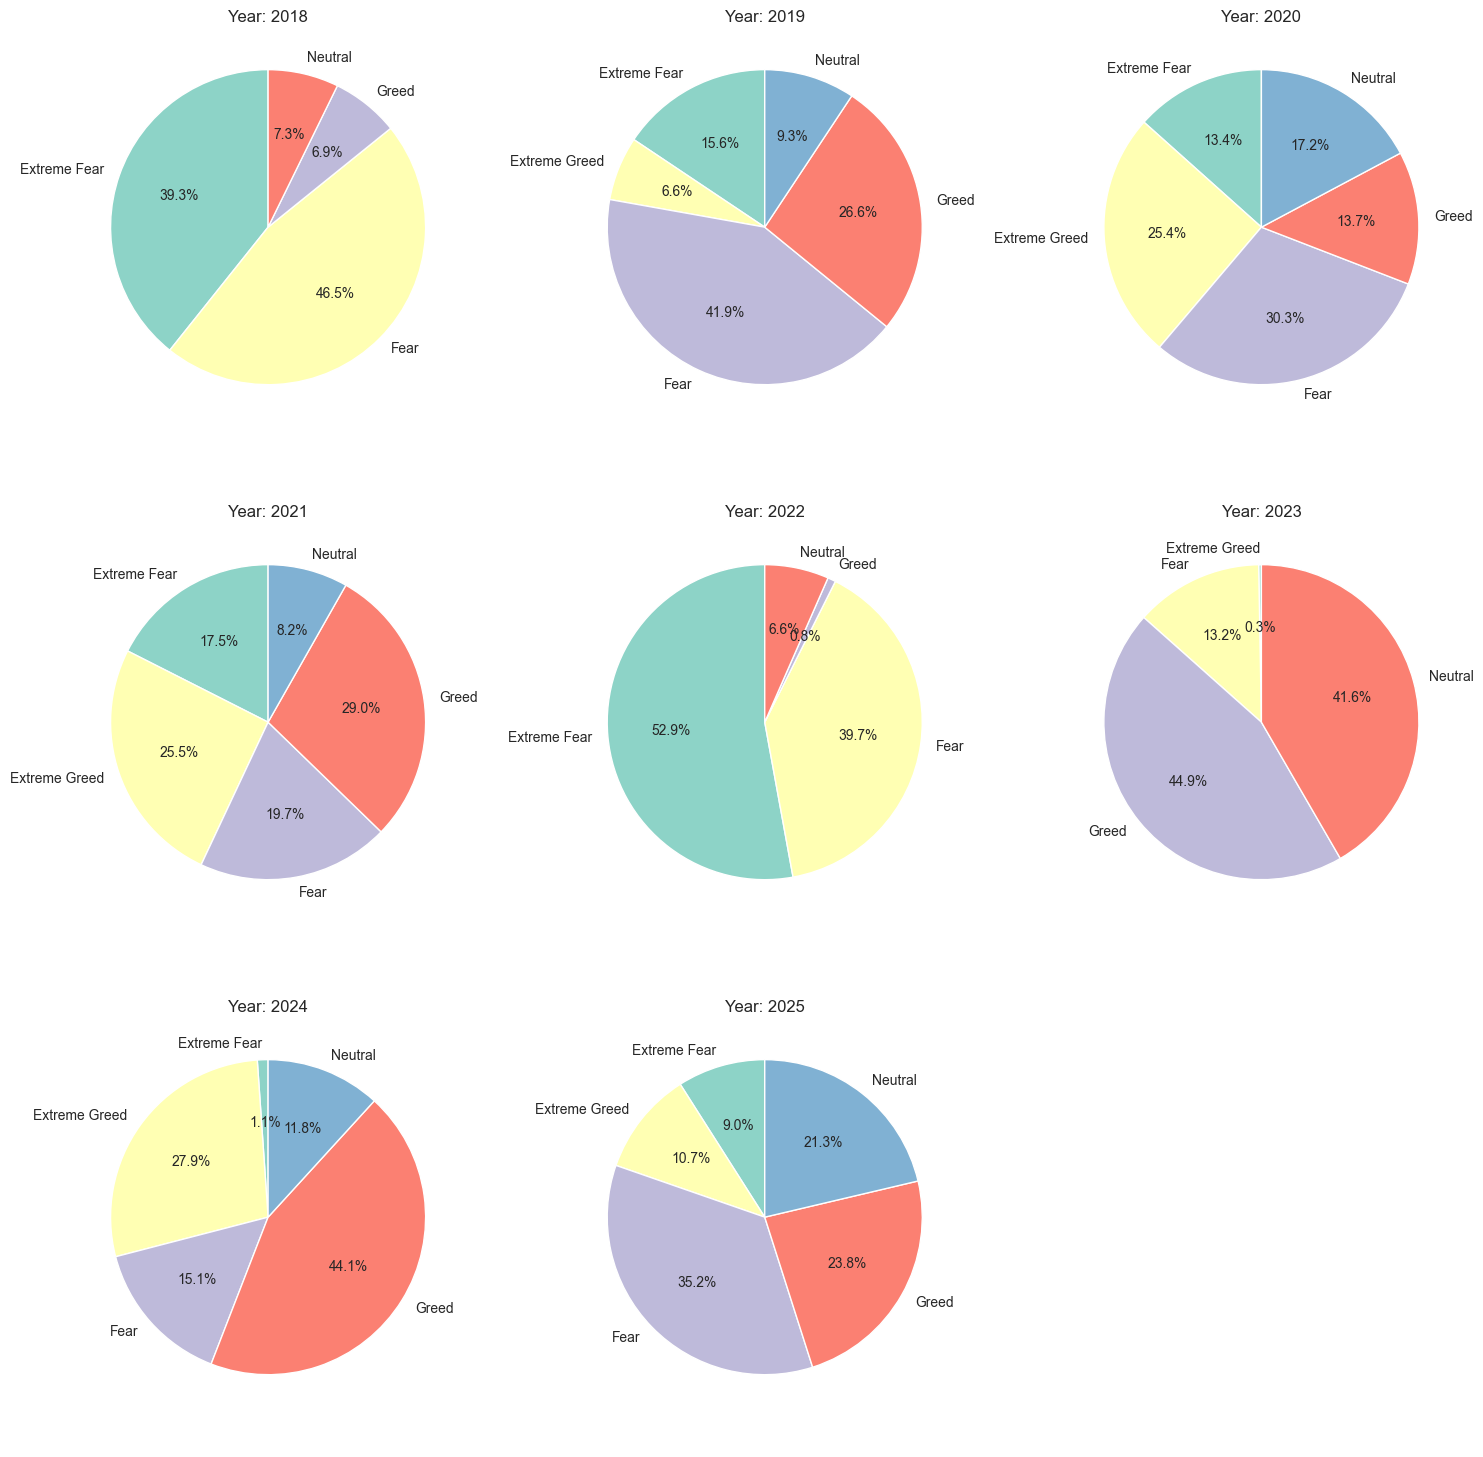

In [21]:
colors = plt.get_cmap('Set3').colors
years = grouped_df["year"].unique()
n_years = len(years)
cols = 3
rows = (n_years + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
axes = axes.flatten()
for i, year in enumerate(sorted(years)):
    data = grouped_df[grouped_df["year"] == year]
    axes[i].pie(data["Count"], labels=data["classification"], autopct='%1.1f%%', startangle=90,colors=colors)
    axes[i].set_title(f'Year: {year}')
for j in range(i + 1, len(axes)):
    axes[j].axis("off")
plt.tight_layout()
plt.show()

>2022 was the most fearful year: — likely due to macroeconomic crashes or bear markets.

>2024 was the most optimistic year: — a period of high risk-taking, possibly overheated markets.

>2025 shows stabilization: — no extreme emotion dominating, reflecting market maturity or indecision.

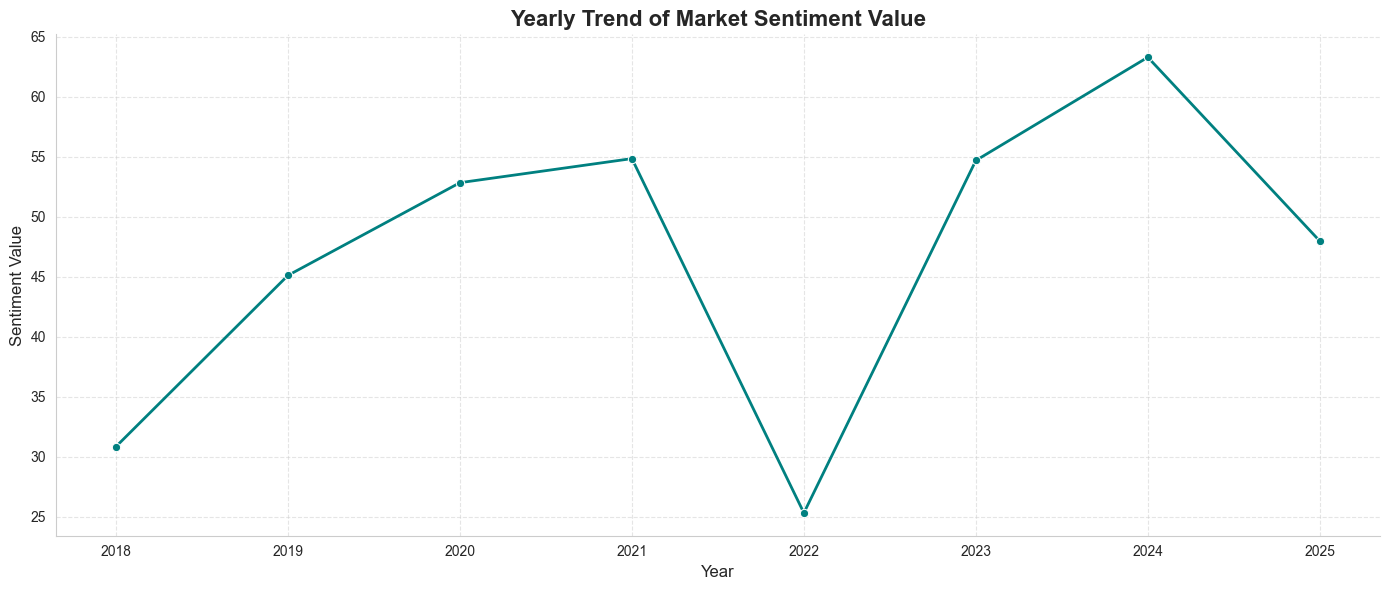

In [22]:
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")
sns.lineplot(
    data=df1,
    x="year",
    y="value",
    errorbar=None,
    marker="o",         
    linewidth=2,
    color="teal"
)
plt.title("Yearly Trend of Market Sentiment Value", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Sentiment Value", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
sns.despine()

plt.tight_layout()
plt.show()

The above statments can be further confirmed with the help of a line graph 

### (i) Dataset 2
lets just combine both the datasets

In [23]:
df2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


the format of timestamp is different for both the datasets

In [24]:
df1['date'] = pd.to_datetime(df1['timestamp'], unit='s').dt.date
df2['date'] = pd.to_datetime(df2['Timestamp'], unit='ms').dt.date

only date information is kept to keep the record of market sentiment on a daily bases instead of timely for merging purpose

In [25]:
df1_dates = set(df1['date'].unique())
df2_dates = set(df2['date'].unique())

common_dates = df1_dates.intersection(df2_dates)
complete_set = df1_dates.union(df2_dates)
print(f"Common Dates: {len(common_dates)}")
print(f"Complete Set: {len(complete_set)}")

Common Dates: 6
Complete Set: 2645


ratio is off by a large margin maybe because the years dont match i guess

In [26]:
df1["date"] = pd.to_datetime(df1["date"])
df2["date"] = pd.to_datetime(df2["date"])

In [27]:
df1["date"].dt.year.min(), df1["date"].dt.year.max()

(2018, 2025)

In [28]:
df2["date"].dt.year.min(), df1["date"].dt.year.max()

(2023, 2025)

As expected the df1_dates dataset has additional values which might be the reason why the ratio seemed off so since we need to merge both the datasets, the data before 2023 become excess or not necessary because we need to explore the relationship between trader performance and market sentiment but since we dont have the data of trader performance from 2018 it becomes irrelevant to keep

In [29]:
df1=df1[df1["year"]>=2023].reset_index(drop=True)
df1.head()

,timestamp,value,classification,date,year
0,1672551000,26,Fear,2023-01-01,2023
1,1672637400,27,Fear,2023-01-02,2023
2,1672723800,26,Fear,2023-01-03,2023
3,1672810200,29,Fear,2023-01-04,2023
4,1672896600,29,Fear,2023-01-05,2023


In [30]:
df1_dates = set(df1['date'].unique())
df2_dates = set(df2['date'].unique())

common_dates = df1_dates.intersection(df2_dates)
complete_set = df1_dates.union(df2_dates)
print(f"Common Dates: {len(common_dates)}")
print(f"Complete Set: {len(complete_set)}")

Common Dates: 6
Complete Set: 853


In [31]:
df2_dates-common_dates

{Timestamp('2025-06-15 00:00:00')}

record of 2025-06-15 is not found in the sentiment dataset 
either we can drop it or just analyse for a suitable value

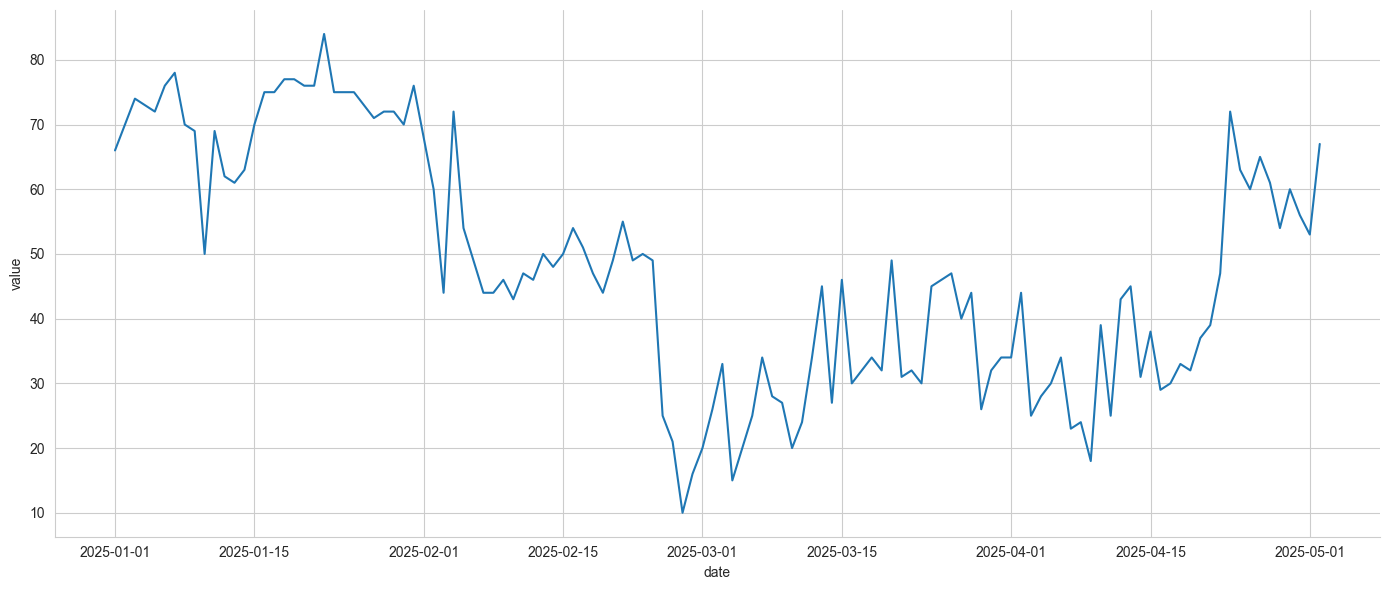

In [32]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df1[df1["year"]==2025],x="date",y="value")
sns.despine()
plt.tight_layout()
plt.show()

problems like these could be solved using forecasting but by analysis we could conclude that the market was in the range of being called greed

In [33]:
df=pd.merge(df2,df1[["date","classification","value"]],on="date",how="left")

In [34]:
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27,Greed,74.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27,Greed,74.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27,Greed,74.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27,Greed,74.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27,Greed,74.0


In [35]:
df.loc[df.isna()["classification"]][:5]

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification,value
372,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AIXBT,0.085079,12195.0,1037.54,BUY,21-04-2025 12:57,0.0,Open Long,0.0,0x4e62cac181aa18b5a46b0421f48fca01ac008820c3fc...,87749427423,True,0.348612,1.190000e+14,1.750000e+12,2025-06-15,NaN,NaN
373,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AIXBT,0.085094,17627.0,1499.95,BUY,21-04-2025 12:57,12195.0,Open Long,0.0,0x4e62cac181aa18b5a46b0421f48fca01ac008820c3fc...,87749427423,True,0.503983,9.920000e+14,1.750000e+12,2025-06-15,NaN,NaN
374,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AIXBT,0.085119,3470.0,295.36,BUY,21-04-2025 12:57,29822.0,Open Long,0.0,0x4e62cac181aa18b5a46b0421f48fca01ac008820c3fc...,87749427423,True,0.099241,2.850000e+14,1.750000e+12,2025-06-15,NaN,NaN
375,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AIXBT,0.085125,12677.0,1079.13,BUY,21-04-2025 12:57,33292.0,Open Long,0.0,0x4e62cac181aa18b5a46b0421f48fca01ac008820c3fc...,87749427423,True,0.362587,6.130000e+14,1.750000e+12,2025-06-15,NaN,NaN
376,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AIXBT,0.085137,12004.0,1021.98,BUY,21-04-2025 12:57,45969.0,Open Long,0.0,0x4e62cac181aa18b5a46b0421f48fca01ac008820c3fc...,87749427423,True,0.343386,2.150000e+14,1.750000e+12,2025-06-15,NaN,NaN


In [36]:
df["classification"].fillna("Greed",inplace=True)
df["value"].fillna(65,inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [38]:
df.drop(["Transaction Hash","Order ID","Fee","Trade ID","Timestamp","date","Crossed"],axis=1,inplace=True)

In [39]:
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,Greed,74.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,Greed,74.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,Greed,74.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,Greed,74.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,Greed,74.0


## 4. Lets start to explore

In [40]:
labels=df["Account"].value_counts()[:5].index
values=df["Account"].value_counts()[:5].values

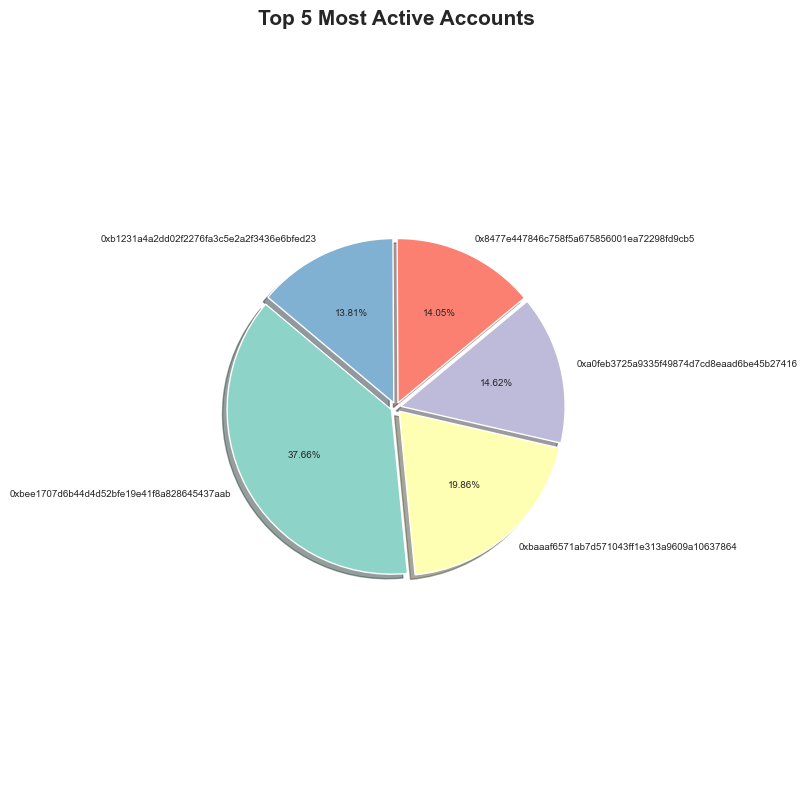

In [41]:
plt.figure(figsize=(8, 8))
colors = plt.get_cmap('Set3').colors
plt.pie(
    values,
    labels=labels,
    autopct="%1.2f%%",
    explode=[0.03]*5,
    shadow=True,
    startangle=140,
    colors=colors,
    textprops={'fontsize': 7}
)
plt.title("Top 5 Most Active Accounts", weight="bold", fontsize=15)
plt.axis("equal")
plt.tight_layout()
plt.show()

### Let's Analyse the behaviour of the the account with the highest profit

In [42]:
acc=df.groupby("Account")["Closed PnL"].sum().idxmax()
acc

'0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23'

In [43]:
df[df["Account"]==acc].head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,classification,value
39055,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.4933,1100.11,BUY,05-12-2023 03:11,0.0000,Open Long,0.0,Greed,69.0
39056,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.8681,1935.95,BUY,05-12-2023 03:11,0.4933,Open Long,0.0,Greed,69.0
39057,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.2500,557.52,BUY,05-12-2023 03:11,1.3614,Open Long,0.0,Greed,69.0
39058,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,3.3733,7522.80,BUY,05-12-2023 03:11,1.6114,Open Long,0.0,Greed,69.0
39059,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,1.8856,4205.08,BUY,05-12-2023 03:11,4.9847,Open Long,0.0,Greed,69.0


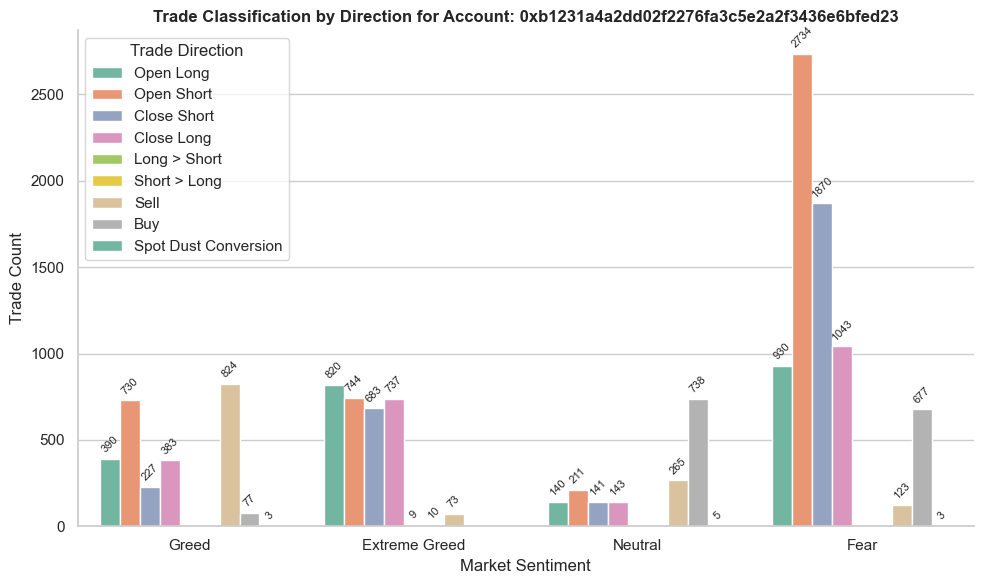

In [44]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
a = sns.countplot(
    data=df[df["Account"] == acc],
    x="classification",
    hue="Direction",
    palette="Set2"
)
for container in a.containers:
    a.bar_label(container, rotation=45, padding=3, fontsize=8)

plt.title(f"Trade Classification by Direction for Account: {acc}", fontsize=12, weight="bold")
plt.xlabel("Market Sentiment")
plt.ylabel("Trade Count")
plt.legend(title="Trade Direction")
sns.despine()
plt.tight_layout()
plt.show()

>Actively traded during Fear, Greed and Extreme Greed phases.

>Majority of trades were made during Fear sentiment — especially Open Short and Close Short, indicating short-selling strategy under bearish conditions.

>Significant Open Long and Close Long trades during Extreme Greed — suggesting a bullish stance when the market was highly optimistic.

>Participated in almost all trade directions, including Spot Dust Conversion, Buy, Sell, Long > Short, and Short > Long.

>Highest spike seen in Open Short (2734 trades) during Fear — this strategy likely generated large profits when prices dropped.

### Let's Generalise the Closed PnL feature for better readability

In [45]:
gen=[]
for i in df["Closed PnL"]:
    if i>0:
        gen.append("positive")
    elif i<0:
        gen.append("negative")
    elif i==0:
        gen.append("neutral")

In [46]:
df["Outcome"]=gen

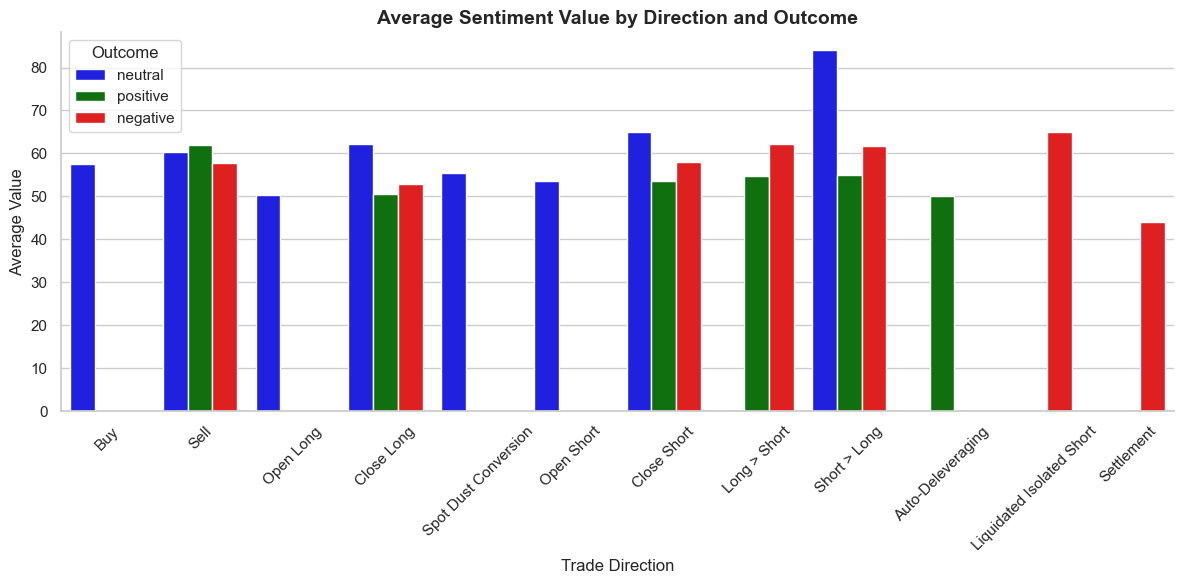

In [47]:
plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(
    data=df,
    x="Direction",
    y="value",
    hue="Outcome",
    palette=["blue", "green", "red"],
    ci=None
)

plt.xticks(rotation=45)

plt.xlabel("Trade Direction", fontsize=12)
plt.ylabel("Average Value", fontsize=12)
plt.title("Average Sentiment Value by Direction and Outcome", fontsize=14, weight='bold')
plt.legend(title="Outcome",loc="upper left")
sns.despine()

plt.tight_layout()
plt.show()

#### Sell
>Nearly equal counts across all outcomes (neutral, positive, negative).
>Indicates consistent use regardless of market success.

#### Buy
>Very few positive or negative outcomes.
>Likely used for position setup rather than speculative gains.

#### Close Long and Close Short 
>Especially Close Short — higher negative outcomes compared to the positive outcome → poor exit timing or forced closure.

#### Liquidated Isolated Short
>As expected — liquidation is a forced closure due to margin calls → always a loss.

#### Auto-Deleveraging
>Possibly triggered by system safety checks, not by poor decisions.

### Which coin has the best average trade performance under each sentiment

In [48]:
pd.options.display.float_format = '{:,.2f}'.format
con=df.groupby(["Coin","classification"])["Closed PnL"].median().reset_index().sort_values(by="Closed PnL",ascending=False)
con.head()

,Coin,classification,Closed PnL
450,ZRO,Greed,"1,147.56"
8,@109,Fear,423.70
321,ONDO,Greed,254.11
463,kSHIB,Extreme Greed,250.28
333,PEOPLE,Extreme Greed,180.32


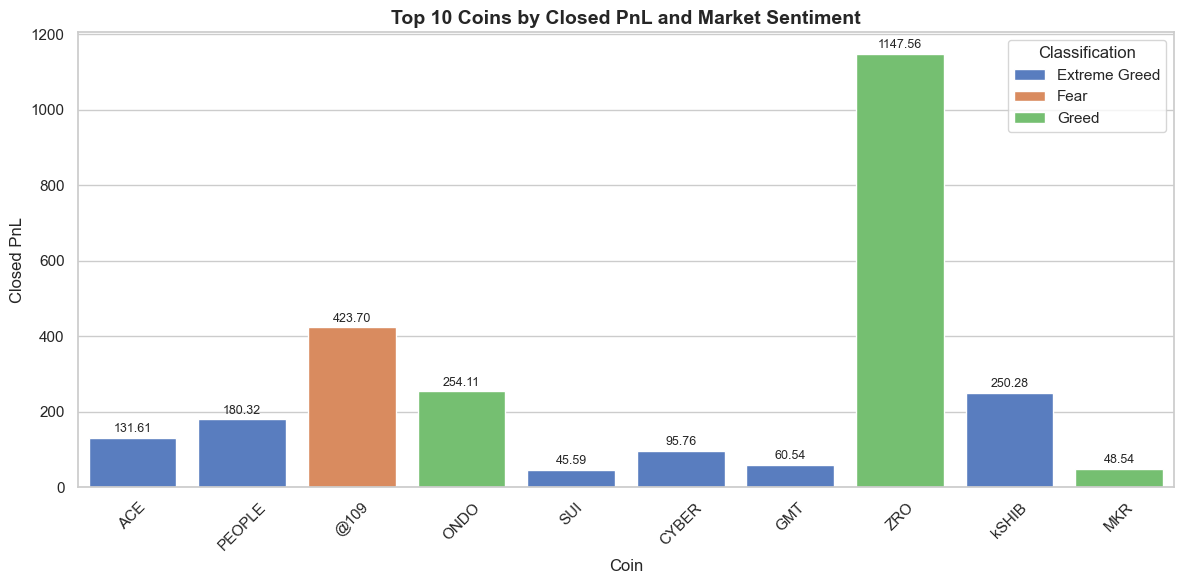

In [49]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(
    data=con.head(10).sample(n=10,random_state=3),
    x="Coin",
    y="Closed PnL",
    hue="classification",
    palette="muted"
)
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", padding=2, fontsize=9)
plt.title("Top 10 Coins by Closed PnL and Market Sentiment", fontsize=14, weight="bold")
plt.xlabel("Coin", fontsize=12)
plt.ylabel("Closed PnL", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Classification", loc="upper right")
plt.tight_layout()
plt.show()

#### ZRO (Greed):

>Highest PnL (1147.56) under Greed sentiment.
Indicates strong bullish behavior and possibly well-timed exits.

#### @109 (Fear)

>Surprisingly high profit (423.70) during Fear.
Suggests strategic shorting or buying dips.

#### KSHIB & ONDO:

>KSHIB (Extreme Greed): Good returns (250.28), likely overconfidence-driven.
>ONDO (Greed): Stable gains (254.11), reflects optimistic trading.

#### Low PnL Coins (SUI, CYBER, GMT, MKR):

>All under Extreme Greed or Greed.
>May indicate poor entry timing or volatility misuse.

### Sentiment vs Total Trade Volume

In [50]:
Size=df.groupby(["classification"])["Size USD"].sum().reset_index().rename(columns={"Size USD":"Total Trade Volume"})
Size

,classification,Total Trade Volume
0,Extreme Greed,"39,406,770.25"
1,Fear,"704,158,492.98"
2,Greed,"425,778,944.88"
3,Neutral,"21,843,234.35"


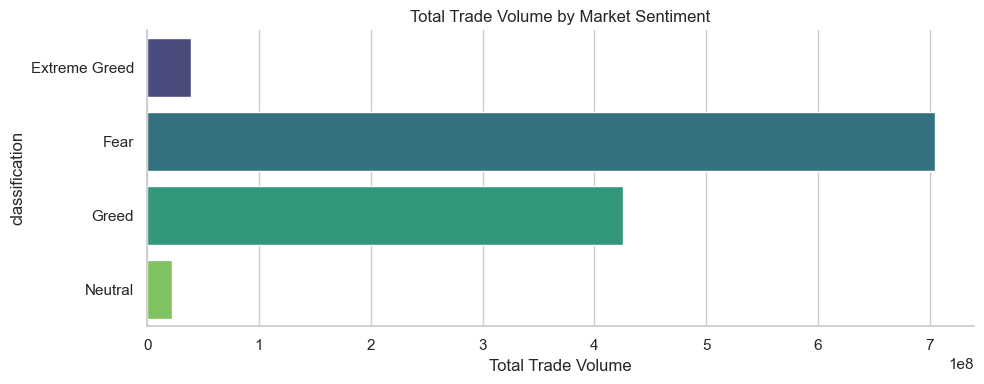

In [51]:
plt.figure(figsize=(10,4))
sns.barplot(data=Size, x="Total Trade Volume",y='classification', palette='viridis')
plt.title("Total Trade Volume by Market Sentiment")
plt.tight_layout()
sns.despine()
plt.show()

>Highest trade volume happens when the market sentiment is Fear, indicating participants are very active during uncertainty or downturns.

>Significant volume in optimistic conditions is seen as well.

>Very low volume during Neutral sentiment — traders likely wait on the sidelines.

>Could suggest overconfidence with fewer trades, or only a few strong holders.

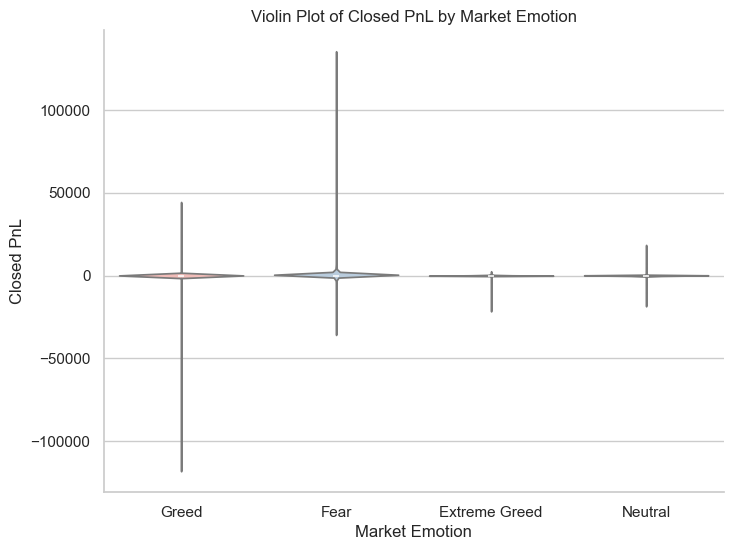

In [52]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='classification', y='Closed PnL', inner='box', palette='Pastel1')
plt.title('Violin Plot of Closed PnL by Market Emotion')
plt.xlabel('Market Emotion')
plt.ylabel('Closed PnL')
sns.despine()
plt.show()

>The distribution of Closed PnL under Fear and Greed sentiments is notably wider, highlighting high trader performance volatility.

>Sentiments like Neutral and Extreme Greed display narrower, denser violins, suggesting concentrated outcomes and less erratic trading behavior.

>The presence of long tails in Fear indicates extreme loss/gain occurrences—an outcome of impulsive trading behavior during uncertain markets.

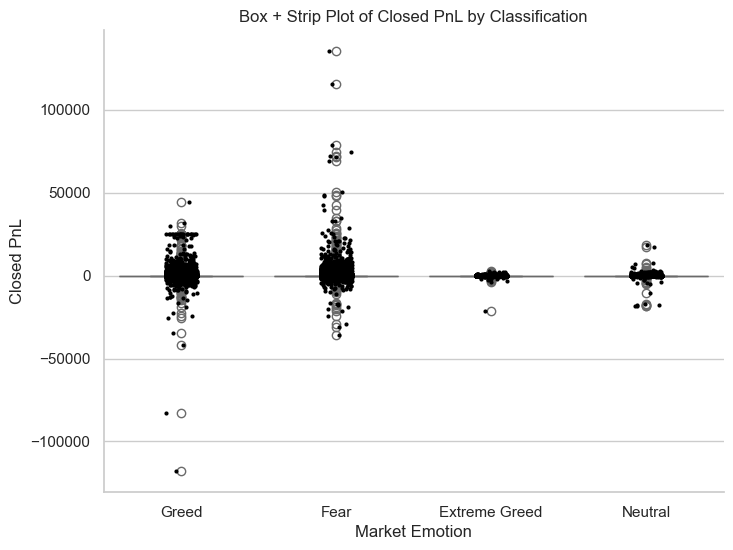

In [53]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='classification', y='Closed PnL', palette='Set3')
sns.stripplot(data=df, x='classification', y='Closed PnL', color='black', size=3, jitter=True)
plt.title('Box + Strip Plot of Closed PnL by Classification')
plt.xlabel('Market Emotion')
plt.ylabel('Closed PnL')
sns.despine()
plt.show()

>The median Closed PnL under Extreme Greed tends to be higher, implying some traders manage to capitalize consistently during bullish sentiment.

>Wider interquartile ranges in volatile sentiment classes highlight inconsistency in returns, while narrower boxes under Neutral indicate stability in trader performance.

## 5. Conclusion Summary

>The highest trading volumes were consistently recorded during periods of Fear. This suggests that traders are most active not during stable markets, but during times of uncertainty and downturns, likely capitalizing on volatility.

>The most successful trader did the opposite of what you might expect. When the market was fearful, they bet that prices would go down (shorting). When the market was greedy, they bought in, expecting prices to go up (going long).

>When the market was either very fearful or very greedy, traders saw the biggest wins and the biggest losses. When the market felt "Neutral," the results were much more stable and less extreme.

>The overall feeling of the market affected which coins made money. For example, the coin ZRO made its biggest profits when the market was in a "Greed" phase.